## Inferential Statistics

<b> In the inferential statistics section I am going to test a couple of variables from the data set to check whether their mean values are statistically different for the defaulting and non-defaulting groups.</b>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [174]:
warnings.filterwarnings("ignore")

### Preparing the data set to visualize the mean and median of variables with respect to the two groups

In [250]:
dfinal = pd.read_csv('dfinal.csv')

In [251]:
# The columns of interest are the most important features that were finalized during the feature selection process
overtopcols = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'INS_AMT_SUM',
 'INS_DAYS_OVERDUE_MEAN',
 'AMT_CREDIT_y',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT_x',
 'POS_CREDIT_TERM_MEAN',
 'BRU_MEAN_AMT_CREDIT_SUM',
 'HOUR_APPR_PROCESS_START_y',
 'INS_DAYS_OVERDUE_MAX',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'INS_NUM_MAX',
 'BRU_MAX_CRDT_SUM_DEBT',
 'HOUR_APPR_PROCESS_START_x',
 'BRU_MEAN_CLOSED_COUNT',
 'BRU_MEAN_ACTIVE_COUNT',
 'WEEKDAY_APPR_PROCESS_START_x',
 'BRU_AMT_MAX_OVERDUE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'PREV_CLT_REP_COUNT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [252]:
overeda = dfinal[overtopcols]

In [253]:
# Renaming the "TARGET" Column as "DEFAULT"
overeda['default'] = dfinal['TARGET']

In [254]:
overeda.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_CREDIT_y,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_x,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,HOUR_APPR_PROCESS_START_y,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START_x,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,WEEKDAY_APPR_PROCESS_START_x,BRU_AMT_MAX_OVERDUE,WEEKDAY_APPR_PROCESS_START_y,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR,default
0,0.262949,0.139376,-9461,-2120,-3648.0,219625.695,20.421053,179055.00,24700.5,-637,-1134.0,406597.5,24.000000,108131.945625,9.000000,31.0,202500.0,0.018801,351000.0,19.0,245781.0,10,6.0,2.0,WEDNESDAY,5043.645,6.0,2.0,0.0,1.0,1
1,0.622246,NaN,-16765,-291,-1186.0,1618864.650,7.160000,484191.00,35698.5,-1188,-828.0,1293502.5,10.107143,254350.125000,14.666667,14.0,270000.0,0.003541,1129500.0,12.0,0.0,11,3.0,1.0,MONDAY,0.000,4.0,1.0,1.0,0.0,0
2,0.555912,0.729567,-19046,-2531,-4260.0,21288.465,7.666667,20106.00,6750.0,-225,-815.0,135000.0,3.750000,94518.900000,5.000000,11.0,67500.0,0.010032,135000.0,3.0,0.0,9,2.0,0.0,MONDAY,0.000,5.0,0.0,0.0,0.0,0
3,0.650442,NaN,-19005,-2437,-9833.0,1007153.415,19.375000,291695.50,29686.5,-3039,-617.0,312682.5,12.000000,NaN,14.666667,77.0,135000.0,0.008019,297000.0,10.0,NaN,17,NaN,NaN,WEDNESDAY,NaN,4.0,2.0,8.0,NaN,0
4,0.322738,NaN,-19932,-3458,-4311.0,835985.340,3.636364,166638.75,21865.5,-3038,-1106.0,513000.0,15.333333,146250.000000,12.333333,31.0,121500.0,0.028663,513000.0,17.0,0.0,11,1.0,0.0,THURSDAY,0.000,3.0,0.0,5.0,0.0,0


In [255]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_CREDIT_y', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT_x', 'POS_CREDIT_TERM_MEAN',
       'BRU_MEAN_AMT_CREDIT_SUM', 'HOUR_APPR_PROCESS_START_y',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START_x',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START_x', 'BRU_AMT_MAX_OVERDUE',
       'WEEKDAY_APPR_PROCESS_START_y', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'PREV_CLT_REP_COUNT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [256]:
# Dropping the columns with suffix y
overeda.drop(columns = ['AMT_CREDIT_y','HOUR_APPR_PROCESS_START_y','WEEKDAY_APPR_PROCESS_START_y'], inplace = True)

In [247]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT_x', 'POS_CREDIT_TERM_MEAN', 'BRU_MEAN_AMT_CREDIT_SUM',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START_x',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START_x', 'BRU_AMT_MAX_OVERDUE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PREV_CLT_REP_COUNT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [257]:
# Renaming some of the columns to remove the suffix x
overeda.columns = [y[0:len(y)-2] if (y[len(y)- 2] == '_') & (y[len(y)- 1] == 'x') else y for y in overeda.columns]

In [184]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT',
       'POS_CREDIT_TERM_MEAN', 'BRU_MEAN_AMT_CREDIT_SUM',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START', 'BRU_AMT_MAX_OVERDUE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PREV_CLT_REP_COUNT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [258]:
pd.options.display.max_columns = None

In [259]:
overeda.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,WEEKDAY_APPR_PROCESS_START,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR,default
0,0.262949,0.139376,-9461,-2120,-3648.0,219625.695,20.421053,24700.5,-637,-1134.0,406597.5,24.000000,108131.945625,31.0,202500.0,0.018801,351000.0,19.0,245781.0,10,6.0,2.0,WEDNESDAY,5043.645,2.0,0.0,1.0,1
1,0.622246,NaN,-16765,-291,-1186.0,1618864.650,7.160000,35698.5,-1188,-828.0,1293502.5,10.107143,254350.125000,14.0,270000.0,0.003541,1129500.0,12.0,0.0,11,3.0,1.0,MONDAY,0.000,1.0,1.0,0.0,0
2,0.555912,0.729567,-19046,-2531,-4260.0,21288.465,7.666667,6750.0,-225,-815.0,135000.0,3.750000,94518.900000,11.0,67500.0,0.010032,135000.0,3.0,0.0,9,2.0,0.0,MONDAY,0.000,0.0,0.0,0.0,0
3,0.650442,NaN,-19005,-2437,-9833.0,1007153.415,19.375000,29686.5,-3039,-617.0,312682.5,12.000000,NaN,77.0,135000.0,0.008019,297000.0,10.0,NaN,17,NaN,NaN,WEDNESDAY,NaN,2.0,8.0,NaN,0
4,0.322738,NaN,-19932,-3458,-4311.0,835985.340,3.636364,21865.5,-3038,-1106.0,513000.0,15.333333,146250.000000,31.0,121500.0,0.028663,513000.0,17.0,0.0,11,1.0,0.0,THURSDAY,0.000,0.0,5.0,0.0,0


In [260]:
# Changing negative values to absolute values to make more sense out of it in the visualization and hypothesis testing
overeda['DAYS_ID_PUBLISH'] = abs(overeda['DAYS_ID_PUBLISH'])
overeda['DAYS_BIRTH'] = abs(overeda['DAYS_BIRTH'])
overeda['DAYS_REGISTRATION'] = abs(overeda['DAYS_REGISTRATION'])
overeda['DAYS_LAST_PHONE_CHANGE'] = abs(overeda['DAYS_LAST_PHONE_CHANGE'])
overeda['DAYS_EMPLOYED'] = abs(overeda['DAYS_EMPLOYED'])
overeda.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,WEEKDAY_APPR_PROCESS_START,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR,default
0,0.262949,0.139376,9461,2120,3648.0,219625.695,20.421053,24700.5,637,1134.0,406597.5,24.000000,108131.945625,31.0,202500.0,0.018801,351000.0,19.0,245781.0,10,6.0,2.0,WEDNESDAY,5043.645,2.0,0.0,1.0,1
1,0.622246,NaN,16765,291,1186.0,1618864.650,7.160000,35698.5,1188,828.0,1293502.5,10.107143,254350.125000,14.0,270000.0,0.003541,1129500.0,12.0,0.0,11,3.0,1.0,MONDAY,0.000,1.0,1.0,0.0,0
2,0.555912,0.729567,19046,2531,4260.0,21288.465,7.666667,6750.0,225,815.0,135000.0,3.750000,94518.900000,11.0,67500.0,0.010032,135000.0,3.0,0.0,9,2.0,0.0,MONDAY,0.000,0.0,0.0,0.0,0
3,0.650442,NaN,19005,2437,9833.0,1007153.415,19.375000,29686.5,3039,617.0,312682.5,12.000000,NaN,77.0,135000.0,0.008019,297000.0,10.0,NaN,17,NaN,NaN,WEDNESDAY,NaN,2.0,8.0,NaN,0
4,0.322738,NaN,19932,3458,4311.0,835985.340,3.636364,21865.5,3038,1106.0,513000.0,15.333333,146250.000000,31.0,121500.0,0.028663,513000.0,17.0,0.0,11,1.0,0.0,THURSDAY,0.000,0.0,5.0,0.0,0


In [188]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT',
       'POS_CREDIT_TERM_MEAN', 'BRU_MEAN_AMT_CREDIT_SUM',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START', 'BRU_AMT_MAX_OVERDUE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PREV_CLT_REP_COUNT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [189]:
# Calculating the mean value for each column for default and non-default groups
ovmean = overeda.groupby('default', as_index = False).mean()

In [261]:
# Calculating the median value for each column for default and non-default groups
ovmed = overeda.groupby('default', as_index = False).median()

In [191]:
ovmean.head()

,default,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.523479,0.520969,16138.176397,3017.219788,5029.941065,677949.983775,11.297230,27163.623349,69668.812255,976.388294,602648.282002,14.483313,383229.162980,37.879407,169077.722266,0.021021,542736.795003,24.123348,507719.009438,12.086807,3.513135,2.021952,6359.375132,1.415742,3.544946,1.889199
1,1,0.410935,0.390717,14884.828077,2732.099617,4487.127009,614110.610489,10.272889,26481.744290,45587.324149,808.796818,557778.527674,14.940229,316600.958111,37.113399,165611.760906,0.019131,488972.412554,24.876284,499155.682675,11.797100,3.122987,2.471328,8922.033307,1.496147,3.792409,2.028783


In [192]:
ovmed.head()

,default,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.573905,0.546023,15877,3295,4544.0,333943.335,9.627907,24876.0,2304,776.0,517788.0,12.0,196213.000000,31.0,148500.0,0.018850,450000.0,12.0,133774.245,12,3.0,2.0,0.0,0.0,2.0,1.0
1,1,0.440381,0.379100,14282,2797,4056.0,271642.050,8.629630,25263.0,1458,594.0,497520.0,12.0,187143.499688,31.0,135000.0,0.018634,450000.0,12.0,193443.750,12,2.0,2.0,0.0,0.0,2.0,2.0


In [263]:
# Creating a function to visualize a certain variable with respect to the default and non-default groups
def credreport(col,ylabel,numbin = 0,ylt = 0,binflag = 0, ylimflag = 0):
    
    plt.subplots(nrows = 1,ncols = 3,figsize = (25,10))
    plt.subplot(1,3,1)
    sns.barplot(ovmean['default'], ovmean[col])
    #plt.bar(dfmean['default'], dfmean['DAYS_ID_PUBLISH'])
    plt.title('mean comparison of defaults vs non-defaults')
    plt.xlabel('default status')
    plt.ylabel(ylabel)
    plt.xticks(ovmean['default'],('non-default','default'))

    plt.subplot(1,3,2)
    sns.barplot(ovmed['default'], ovmed[col])
    #plt.title('mean comparison of defaults vs non-defaults')
    plt.xlabel('default status')
    plt.ylabel(ylabel)
    #plt.xticks(dfmean['default'],('non-default','default')
    plt.title('median comparison of defaults vs non-defaults')
    #plt.ylabel('normalized ext source 2 score')
    plt.xticks(ovmed['default'],('non-default','default'))


    plt.subplot(1,3,3)

    ax = sns.boxplot(y = col, x = 'default', data = overeda, showfliers = True)
    #dfeda[dfeda['default'] == 0].boxplot(column = ['AMT_INCOME_TOTAL'])
    if ylimflag == 1:
        ax.set(ylim =(0,ylt))
    plt.xlabel('default status')
    plt.ylabel(ylabel)
    if binflag == 1:
        plt.locator_params(axis ='y', nbins= numbin)
    
    plt.xticks(ovmean['default'],('non-default','default'))
    #plt.locator_params(axis='x', nbins=10)

    plt.subplots_adjust(wspace = 0.4)
    plt.show()

## Checking the AGE

<b> The visual comparison of age of default group versus non-default group shows that the mean age of people who 
default is less than the default age of people who don't.

This insight suggests on average the people who default are less in age than the people who don't default. But 
whether this difference is statistically signifinact?  Let's run the statistical tests to confirm it. </b>

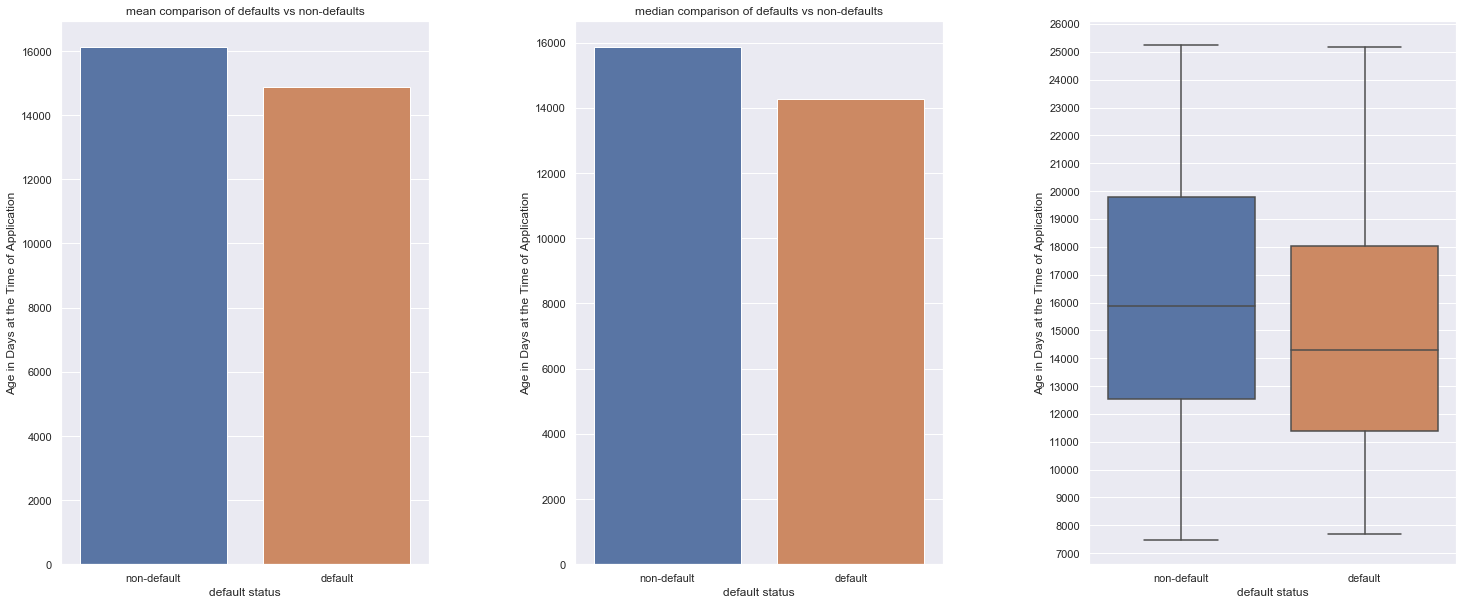

In [196]:
credreport('DAYS_BIRTH','Age in Days at the Time of Application',numbin = 35, binflag = 1)

## Checking Normality of the Distribution of AGE

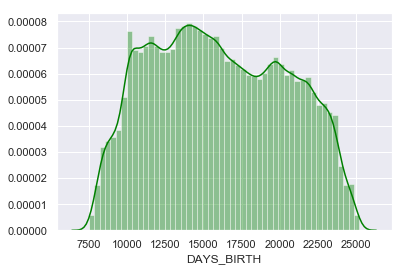

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
plt.clf()
sns.distplot(overeda['DAYS_BIRTH'].dropna(), color = 'green')
#plt.hist(temp_theor, bins = 12, color = 'red', density = True, alpha = 0.5)
warnings.filterwarnings("ignore")

In [198]:
from scipy.stats import shapiro
from scipy.stats import normaltest

def normality_test(data):
    
    data = data.dropna()
    stat_shapiro, p_shapiro = shapiro(data)

    print('shapiro stat value: {:0.2f}, p-value:{:0.4f}'.format(stat_shapiro, p_shapiro))

    stat_k2, p_k2 = normaltest(data)

    print('k2 stat value: {:0.2f}, p-value:{:0.4f}'.format(stat_k2, p_k2))

In [199]:
normality_test(overeda['DAYS_BIRTH'])

shapiro stat value: 0.97, p-value:0.0000
k2 stat value: 93796.73, p-value:0.0000


<b> Checking the distribution both visually and statistically concludes that the distribution is not normal. But as we are conncerned about the difference of means here , from central limit theorem we can also use the t-test apart from using the bootstrap approach to find whether the difference in means is statistically significant. </b>

## Bootstrap Method

In [200]:
#Function to generate a bootstrap sample i.e. sample with replacement for a signle group
def bootstrap(data, func):
    
    bs_samples = np.random.choice(data, len(data))
    return func(bs_samples)

# Function to create a bootstrap replicates using a summarizing/aggregating function 
def draw_bootstrap_samples(data, func, size = 1):
    
    bs_replicates = np.empty(size)
    
    # Generate Replicates
    for i in range(size):
        bs_replicates[i] = bootstrap(data,func)
    return bs_replicates

In [201]:
def bootstrap_result(datacom,datanondef,datadef):
    
    
    observed_meandiff = datanondef.mean() - datadef.mean()
    print('The observed difference in mean between the two groups is {:0.2f}'.format(observed_meandiff))
    
    # Mean of the two groups defore shifting the means to combined mean
    print("The mean of the nondefault group before shifting the mean is {:0.4f}".format(datanondef.mean()))
    print("The mean of the default group before shifting the mean is {:0.4f}". format(datadef.mean()))
    
    # Shifting the mean of the two groups to make it equal to the combined mean
    datanondef_shift = datanondef - datanondef.mean() + datacom.mean()
    datadef_shift = datadef - datadef.mean() + datacom.mean()
    
    # Mean of the two groups after shifting the means to combined mean
    print("The mean of the nondefault group after shifting the mean is {:0.4f}".format(datanondef_shift.mean()))
    print("The mean of the default group after shifting the mean is {:0.4f}". format(datadef_shift.mean()))
    
    #draw bootstrap samples for both the group with shfted means
    datadef_samples = draw_bootstrap_samples(datadef_shift, np.mean, 10000)
    datanondef_samples = draw_bootstrap_samples(datanondef_shift, np.mean, 10000)
    
    # bootstrap_sample_difference
    
    data_sample_difference = datanondef_samples - datadef_samples
    
    # Calculate the p-value by calculating the proportion of means that was greater than the observed proportion
    p_val_boot = np.sum(data_sample_difference >= observed_meandiff)/len(data_sample_difference)
    print('The p-value for difference of means using the bootstrap approach is {:0.4f}'.format(p_val_boot))
    
    if p_val_boot < 0.05:
        print('The null hypotheis that there is no difference in the means of default and non-default group can be rejected')
    else:
        print('The null hypotheis that there is no difference in the means of default and non-default group cannot be rejected')
    
    
    data_def_samples_raw = draw_bootstrap_samples(datadef, np.mean, 10000 )
    data_nondef_samples_raw = draw_bootstrap_samples(datanondef, np.mean, 10000)
        
    data_sample_difference_raw = data_nondef_samples_raw - dob_def_samples_raw
    
    boot_conf_int = np.percentile(data_sample_difference_raw, [2.5,97.5])
    print('The confidence interval of diiference in means between the two group, using the bootstrap approach is {}'.format(str(boot_conf_int)))

In [202]:
dob_def = overeda[overeda['default'] == 1]['DAYS_BIRTH']
dob_nondef = overeda[overeda['default'] == 0]['DAYS_BIRTH']

In [203]:
bootstrap_result(overeda['DAYS_BIRTH'], dob_nondef, dob_def)

The observed difference in mean between the two groups is 1253.35
The mean of the nondefault group before shifting the mean is 16138.1764
The mean of the default group before shifting the mean is 14884.8281
The mean of the nondefault group after shifting the mean is 16036.9951
The mean of the default group after shifting the mean is 16036.9951
The p-value for difference of means using the bootstrap approach is 0.0000
The null hypotheis that there is no difference in the means of default and non-default group can be rejected
The confidence interval of diiference in means between the two group, using the bootstrap approach is [1197.70977397 1306.96652171]


## T-test for difference of means

In [204]:
dob_def = overeda[overeda['default'] == 1]['DAYS_BIRTH']
dob_nondef = overeda[overeda['default'] == 0]['DAYS_BIRTH']

In [205]:
dob_nondef.mean() - dob_def.mean()

1253.3483205974644

In [206]:
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(dob_nondef.dropna(), dob_def.dropna())

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: 43.519835561018134
p value = 0.0


<b> Both the t-test and bootstrap method returns a p-value of 0 which means that the null hypothesis that the mean of age(in terms of days) of the two groups, the one which defaulted and the other one that didn't default are not same with the non defaulting having a higher age than the defaulting group by 1253 days on average. <b>

<b> Conclusion : From the given finding we would like to believe that the age has a positive correlation with probability of not defaulting. </b>

## Checking Employment Duration

<b> Let's also investigate the employment duration variable for the defaults and nondefaults group and findout whether
whether statistically they differ on this parameter </b>

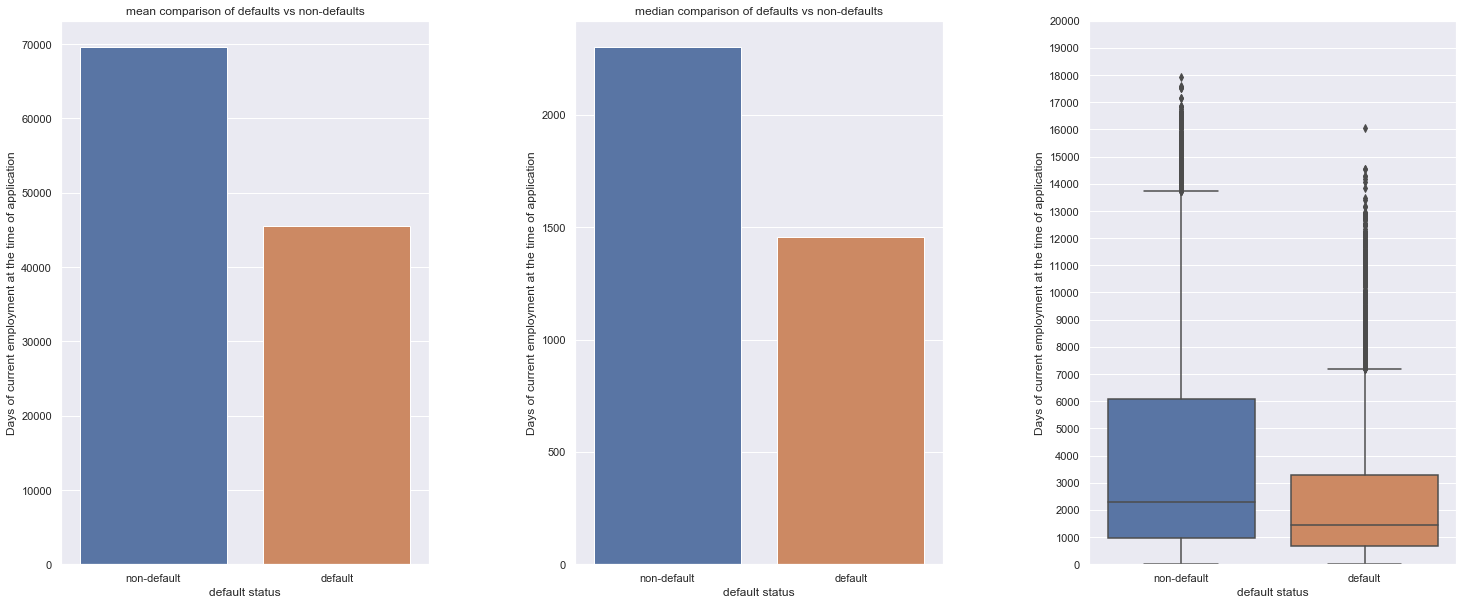

In [208]:
credreport('DAYS_EMPLOYED','Days of current employment at the time of application',numbin =35,ylt = 20000, binflag = 1,ylimflag = 1)

<b> The bargraph shows that there is a difference in mean as well as median of employment days between the default
and non-default group. But to statistically prove this assumption let's run a hypothesis test. </b>

## Checking Normality of the Distribution of Employment Duration

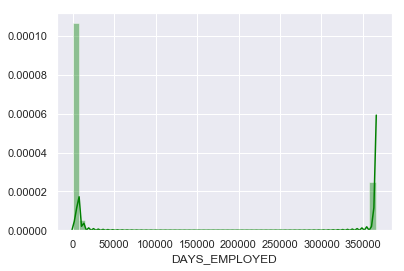

In [212]:
sns.distplot(overeda['DAYS_EMPLOYED'].dropna(), color = 'green')

In [214]:
normality_test(overeda['DAYS_EMPLOYED'])

shapiro stat value: 0.48, p-value:0.0000
k2 stat value: 76991.64, p-value:0.0000


<b> Checking the distribution both visually and statistically concludes that the distribution is not normal. But as we are conncerned about the difference of means here , from central limit theorem we can also use the t-test apart from using the bootstrap approach to find whether the difference in means is statistically significant. </b>

In [216]:
emp_def = overeda[overeda['default'] == 1]['DAYS_EMPLOYED']
emp_nondef = overeda[overeda['default'] == 0]['DAYS_EMPLOYED']

In [218]:
bootstrap_result(overeda['DAYS_EMPLOYED'], emp_nondef, emp_def)

The observed difference in mean between the two groups is 24081.49
The mean of the nondefault group before shifting the mean is 69668.8123
The mean of the default group before shifting the mean is 45587.3241
The mean of the nondefault group after shifting the mean is 67724.7421
The mean of the default group after shifting the mean is 67724.7421
The p-value for difference of means using the bootstrap approach is 0.0000
The null hypotheis that there is no difference in the means of default and non-default group can be rejected
The confidence interval of diiference in means between the two group, using the bootstrap approach is [54256.77108025 55301.2209549 ]


## T-test for difference of means in employment duration between the two groups

In [220]:
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(emp_nondef.dropna(), emp_def.dropna())

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: 26.117472915184766
p value = 3.3720959658864795e-150


<b> Both the t-test and bootstrap method returns a p-value of almost 0 which means that the null hypothesis that the mean of employment duration(in terms of days) of the two groups, the one which defaulted and the other one that didn't default are not same with the non defaulting group having a higher employment duration than the defaulting group by 24081 days on average. <b>

<b> Conclusion : From the given finding we would like to believe that the employment duration (in number of days) has a positive correlation with probability of not defaulting. </b>